## Bring Bubble to Rest

In [1]:
from bubble_tools import *
from experiment import *



/home/dpirvu/.local/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


No handles with labels found to put in legend.


0.12 1.7951958020513104 0.2804597482039711
0.1 1.7951958020513104 0.23827857770296607
0.08 1.7951958020513104 0.1916131500067567
0.11 1.7951958020513104 0.25986275091497074


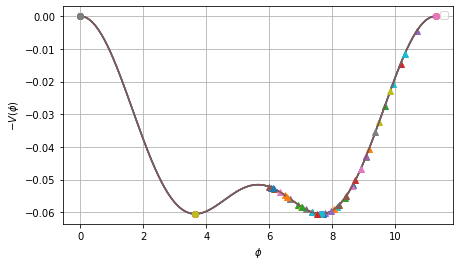

No handles with labels found to put in legend.


0.12 1.7951958020513104 0.2804597482039711


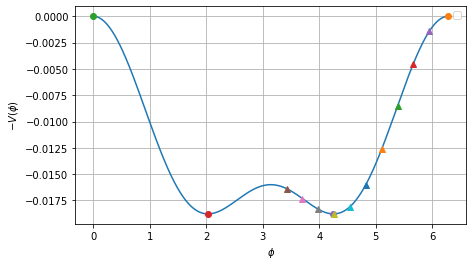

In [2]:
philist = np.linspace(0, 2.*np.pi, 1000)
elems = [upper_phi_bound, lower_phi_bound, left_Vmax.x, right_Vmax.x]

fig = plt.figure(figsize=(7, 4))
for tmp, temp in enumerate(Tlist):
    #if tmp!=1: continue

    ph0        = phi0List[tmp]
    sigmafld   = fluct_stdev(m2eff, ph0, temp)
    print(temp, ph0, sigmafld)

    plt.plot(philist*ph0, V(philist)*ph0**2.)
    [plt.plot(ee*ph0, V(ee)*ph0**2., 'o') for ee in elems]

    thresh_list = np.linspace(phieq+sigmafld, phieq+10*sigmafld, 10)    
    for vv in thresh_list:
        plt.plot(vv*ph0, V(vv)*ph0**2., marker='^')

plt.xlabel(r'$\phi$'); plt.ylabel(r'$-V(\phi)$')
plt.grid(); plt.legend(); plt.show()

philist = np.linspace(0, 2.*np.pi, 1000)
elems = [upper_phi_bound, lower_phi_bound, left_Vmax.x, right_Vmax.x]

fig = plt.figure(figsize=(7, 4))
for tmp, temp in enumerate(Tlist):
    if tmp!=0: continue

    ph0        = phi0List[tmp]
    sigmafld   = fluct_stdev(m2eff, ph0, temp)
    print(temp, ph0, sigmafld)

    plt.plot(philist, V(philist))
    [plt.plot(ee, V(ee), 'o') for ee in elems]

    thresh_list = np.linspace(phieq+sigmafld, phieq+10*sigmafld, 10)    
    for vv in thresh_list:
        plt.plot(vv, V(vv), marker='^')

plt.xlabel(r'$\phi$'); plt.ylabel(r'$-V(\phi)$')
plt.grid(); plt.legend(); plt.show()

In [3]:
minSim = 0
maxSim = 2000
#minSim = 2000
#maxSim = 4000
#minSim = 4000
#maxSim = 6000
tmp=3

temp  = Tlist[tmp]
ph0   = phi0List[tmp]
print('Looking at at temperature T, phi0, m2, sigma:', temp, ph0, m2eff)


Looking at at temperature T, phi0, m2, sigma: 0.11 1.7951958020513104 0.01


In [4]:
good_decays_path = sims_that_decay_fine_file(nLat, lamb, ph0, temp, minSim, maxSim, nTimeMAX)
if os.path.exists(good_decays_path+'.npy'):
    good_decays  = np.asarray(np.load(good_decays_path + '.npy'))
    simList = []
    for sim, outcome in good_decays:
        loc_sim = clean_sim_location(nLat, lamb, ph0, temp, sim)+'.npy'
        if os.path.exists(loc_sim):

          #  rest_sim = bubble_at_rest(nLat, lamb, ph0, temp, sim)+'.npy'
          #  if not os.path.exists(rest_sim):
            simList.append(sim)
    print('Remaining sims to compute:', simList)

Remaining sims to compute: [1, 2, 4, 5, 6, 7, 9, 11, 12, 18, 19, 20, 21, 22, 23, 29, 30, 31, 33, 34, 35, 36, 42, 43, 45, 47, 48, 49, 50, 52, 53, 55, 56, 57, 59, 60, 62, 65, 67, 68, 71, 72, 73, 75, 76, 80, 82, 90, 92, 93, 95, 98, 99, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 114, 116, 118, 119, 120, 124, 126, 128, 129, 131, 132, 133, 135, 137, 141, 142, 144, 147, 148, 152, 156, 157, 159, 160, 161, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 175, 176, 180, 182, 183, 184, 185, 186, 187, 189, 190, 191, 193, 195, 196, 200, 202, 203, 204, 206, 208, 209, 210, 213, 214, 217, 218, 219, 220, 221, 223, 224, 225, 227, 229, 231, 235, 237, 239, 240, 241, 243, 244, 245, 246, 247, 252, 254, 257, 258, 259, 260, 261, 262, 264, 266, 270, 271, 272, 273, 274, 275, 277, 278, 279, 280, 281, 284, 285, 287, 291, 293, 294, 296, 297, 301, 305, 307, 309, 310, 311, 312, 314, 315, 317, 318, 320, 322, 324, 326, 327, 328, 330, 331, 335, 336, 337, 339, 343, 348, 350, 351, 352, 353, 354, 356, 358, 361, 36

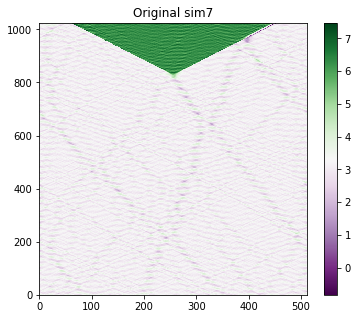

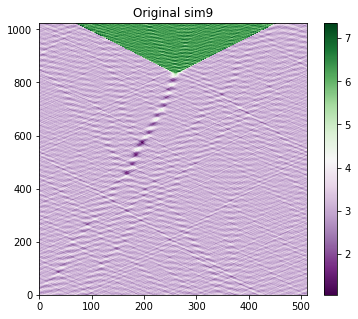

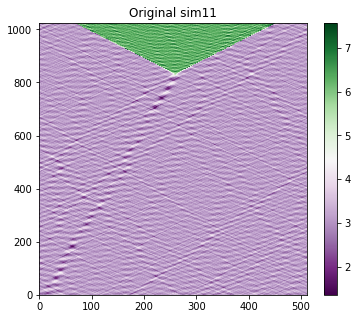

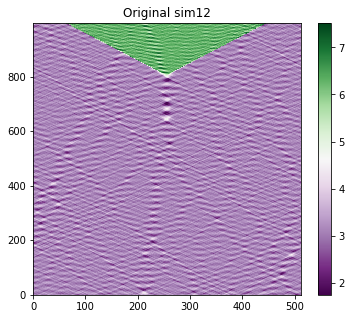

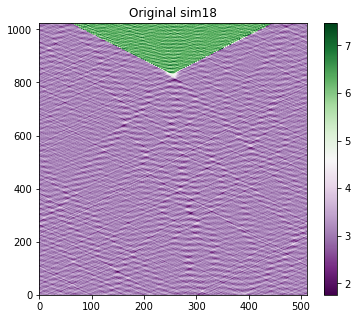

In [5]:
for sim in simList[5:10]:
    loc_sim = clean_sim_location(nLat, lamb, ph0, temp, sim)+'.npy'
    fullreal, sim, tdecay = np.load(loc_sim)

    # this is to speed up the boosting in anticipation of the N-column simulations 
    nT, nN = np.shape(fullreal[0])
    simple_imshow(fullreal[0], [0,nN,0,nT], 'Original sim'+str(sim))


In [52]:
%run 'bubble_tools.py'

In [53]:
sigmafld = fluct_stdev(m2eff, ph0, temp)
ampList  = np.linspace(phieq + 4.*sigmafld, phieq + 6.*sigmafld, 30)
xList    = np.arange(50, 61, 10)
#xList    = np.arange(crit_rad, 2*crit_rad, 2)
print('Looking at at temperature T, phi0, m2, sigma:', temp, ph0, m2eff, sigmafld)


Looking at at temperature T, phi0, m2, sigma: 0.11 1.7951958020513104 0.01 0.25986275091497074


Starting simulation 2
Looking at at temperature T, phi0, m2, sigma: 0.11 1.7951958020513104 0.01 0.25986275091497074


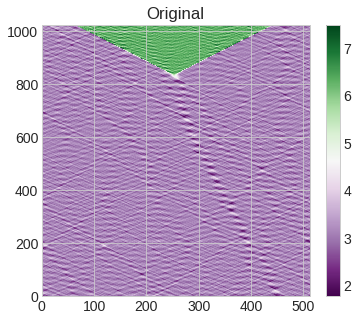

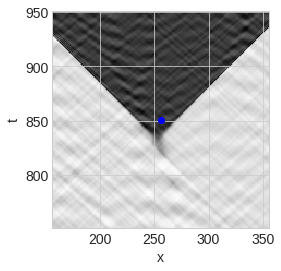

/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:171: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, a, b, c: np.sqrt(c + (t - b)**2.) + a


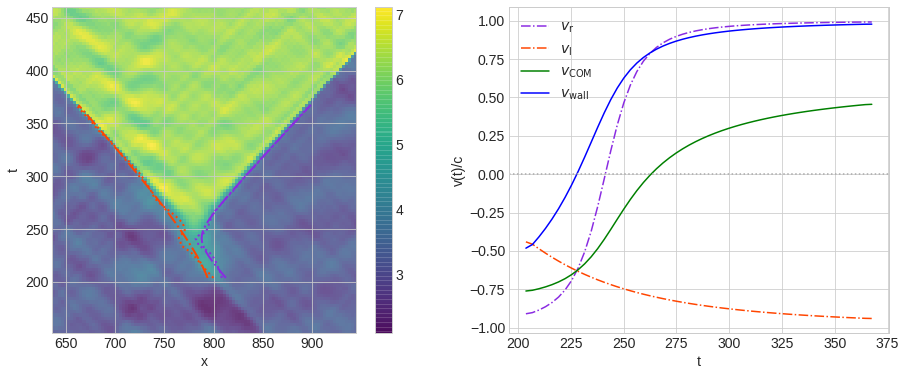

/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:171: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, a, b, c: np.sqrt(c + (t - b)**2.) + a


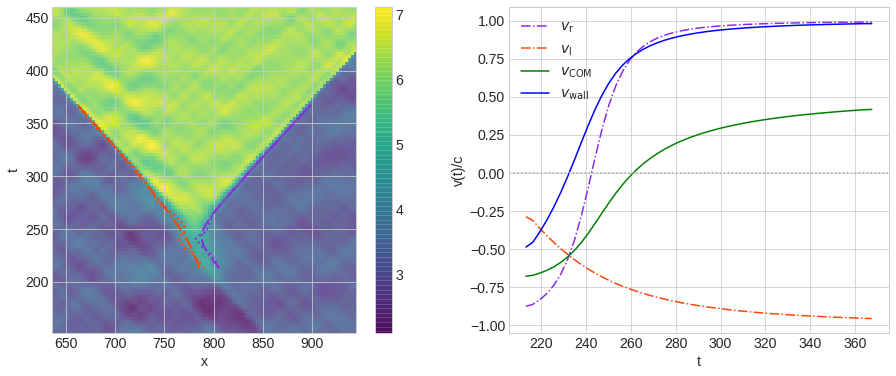

/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:171: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, a, b, c: np.sqrt(c + (t - b)**2.) + a


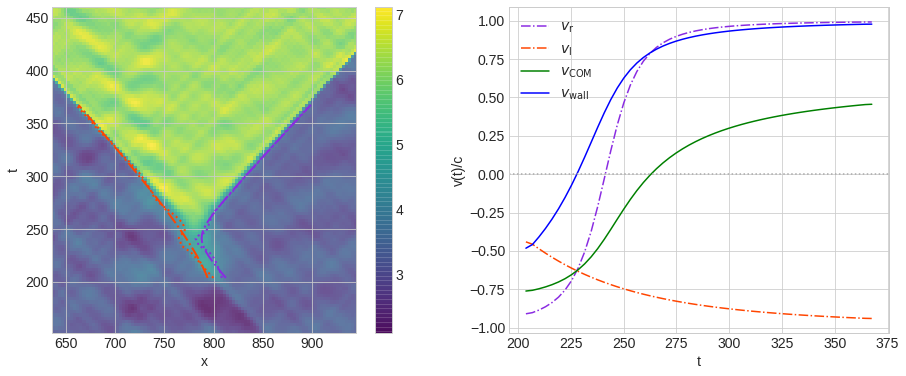

/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:171: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, a, b, c: np.sqrt(c + (t - b)**2.) + a


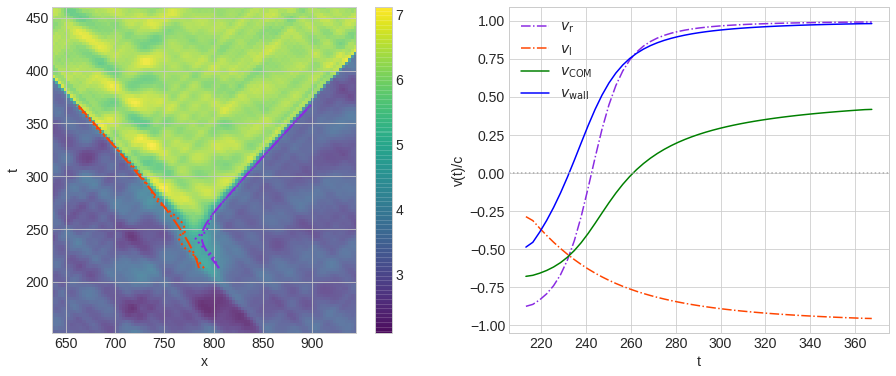

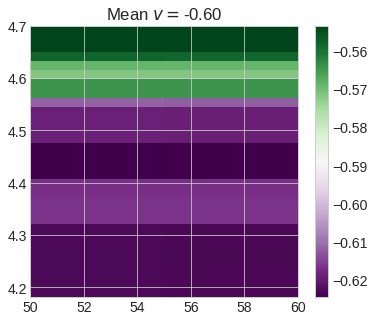

-0.25 [-0.25]


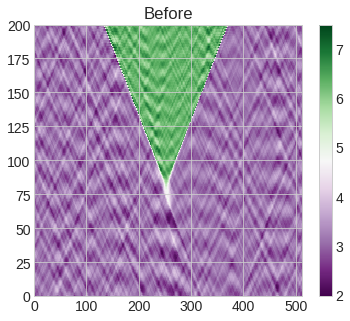

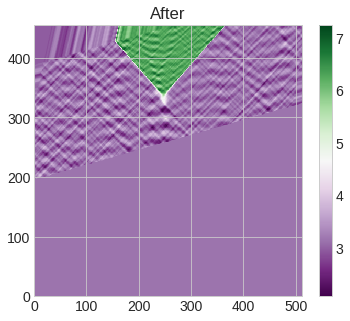

/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:171: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, a, b, c: np.sqrt(c + (t - b)**2.) + a


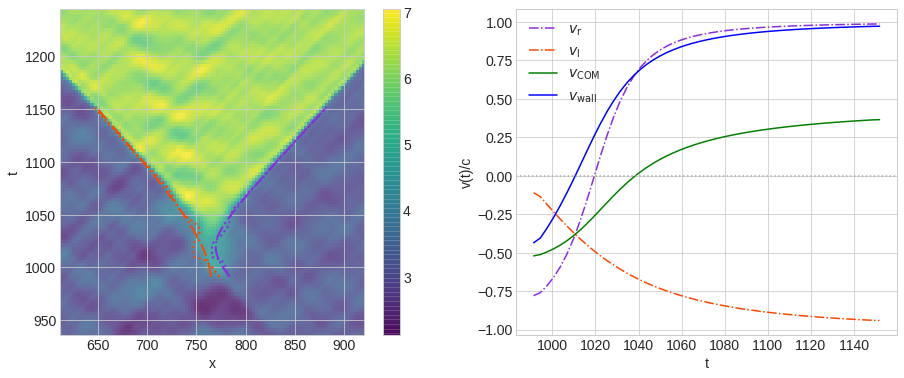

/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:171: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, a, b, c: np.sqrt(c + (t - b)**2.) + a
/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:181: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, d, e, f: - np.sqrt(f + (t - e)**2.) + d


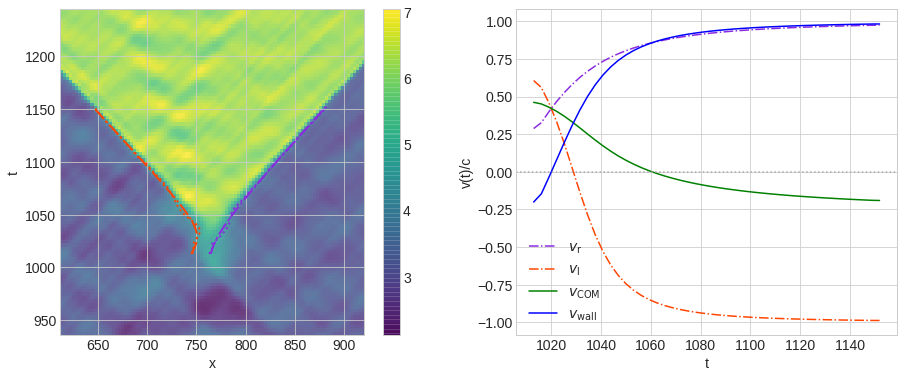

/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:171: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, a, b, c: np.sqrt(c + (t - b)**2.) + a


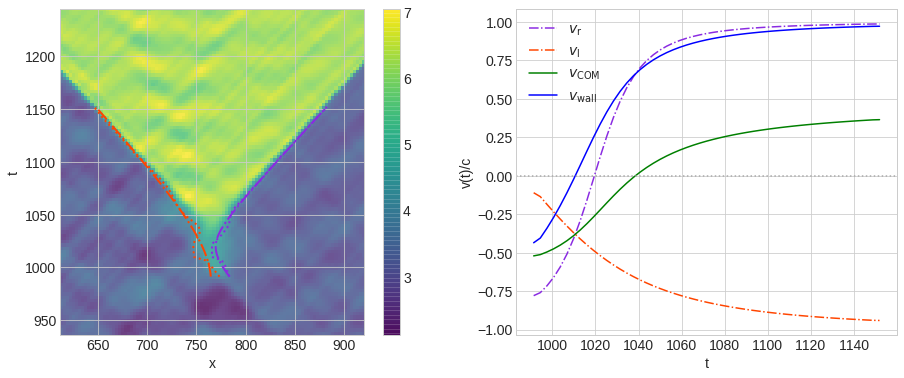

/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:171: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, a, b, c: np.sqrt(c + (t - b)**2.) + a
/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:181: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, d, e, f: - np.sqrt(f + (t - e)**2.) + d


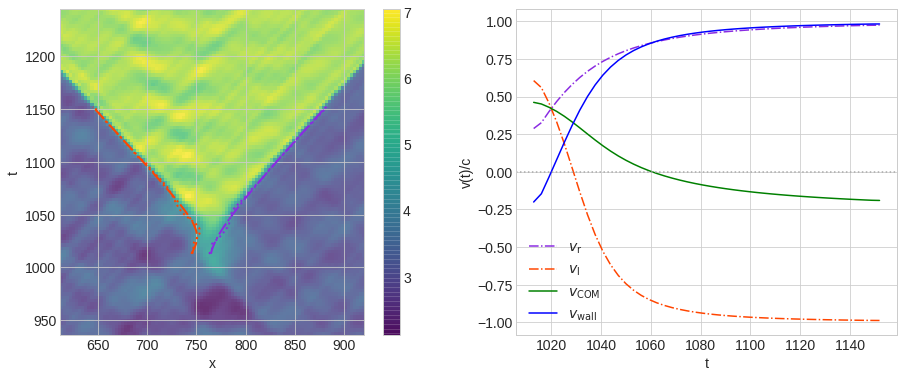

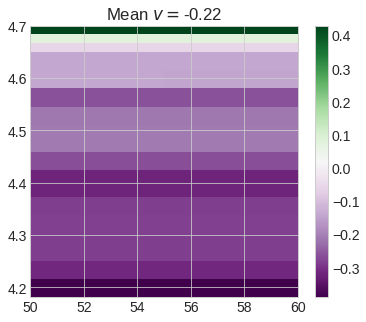

-0.21793820284982868 [-0.25, -0.21793820284982868]


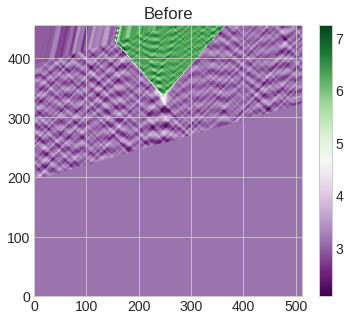

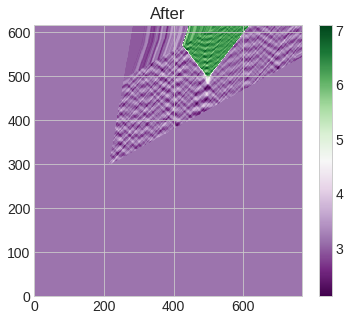

/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:181: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, d, e, f: - np.sqrt(f + (t - e)**2.) + d
/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:171: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, a, b, c: np.sqrt(c + (t - b)**2.) + a


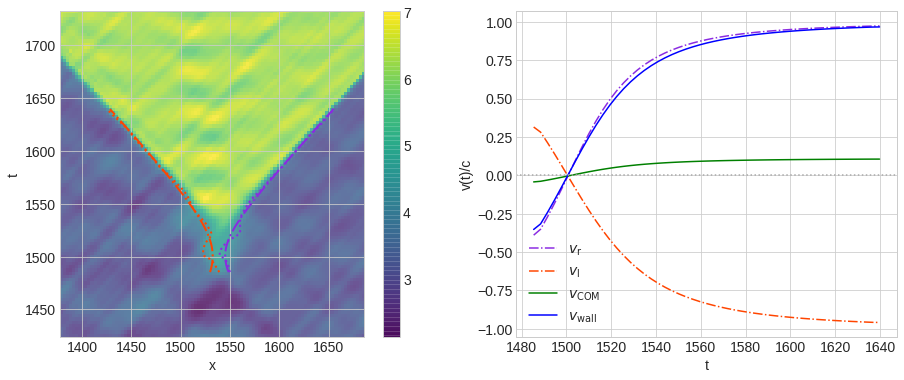

/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:181: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, d, e, f: - np.sqrt(f + (t - e)**2.) + d
/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:171: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, a, b, c: np.sqrt(c + (t - b)**2.) + a


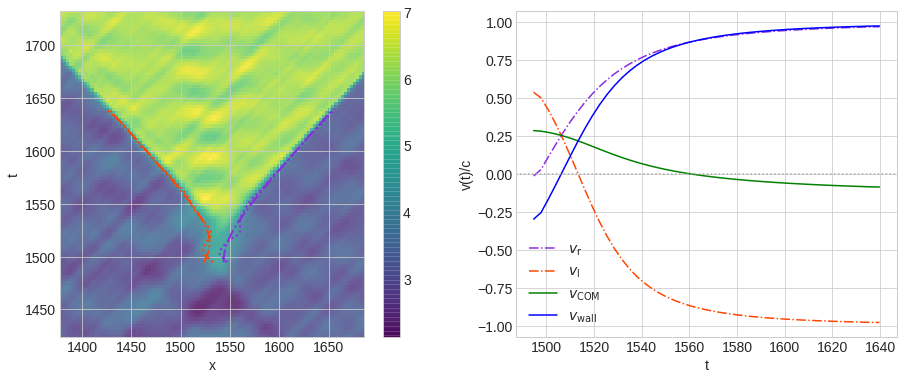

/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:181: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, d, e, f: - np.sqrt(f + (t - e)**2.) + d
/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:171: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, a, b, c: np.sqrt(c + (t - b)**2.) + a


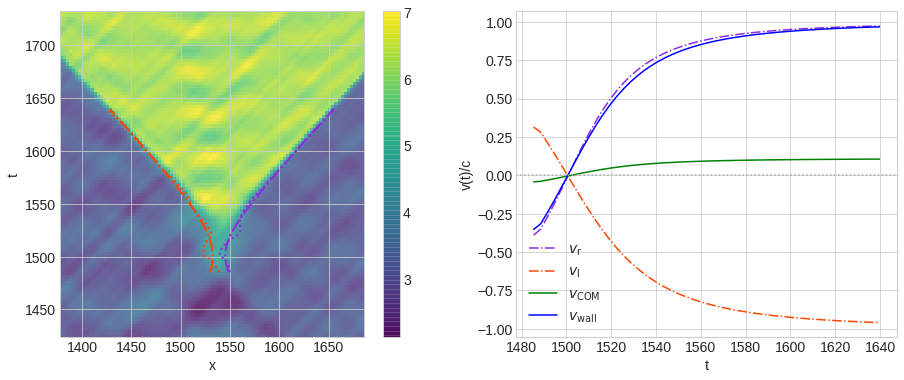

/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:181: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, d, e, f: - np.sqrt(f + (t - e)**2.) + d
/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:171: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, a, b, c: np.sqrt(c + (t - b)**2.) + a


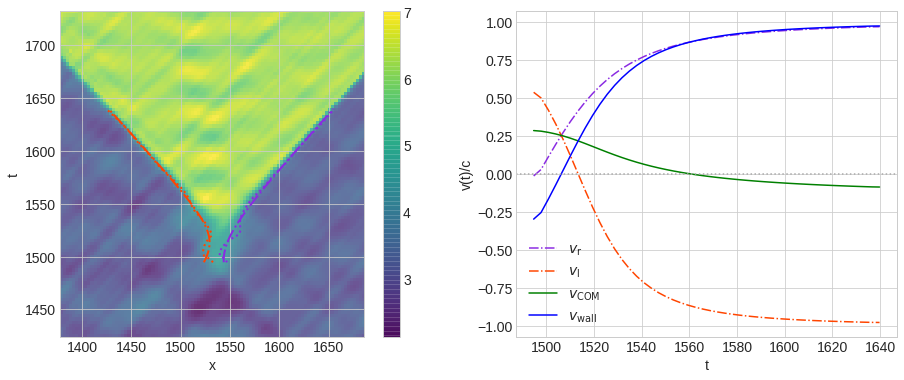

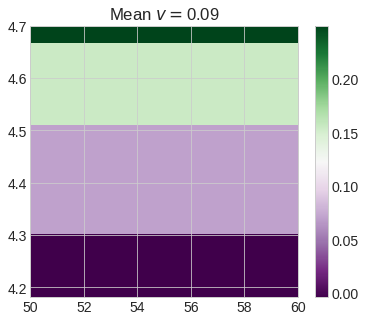

0.09065544278729214 [-0.25, -0.21793820284982868, 0.09065544278729214]


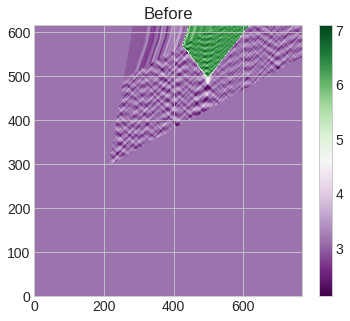

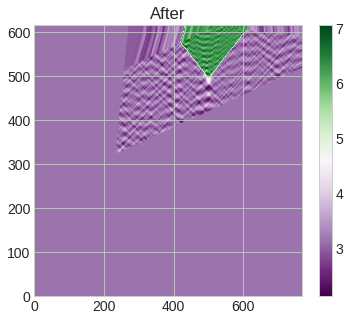

/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:181: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, d, e, f: - np.sqrt(f + (t - e)**2.) + d
/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:171: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, a, b, c: np.sqrt(c + (t - b)**2.) + a


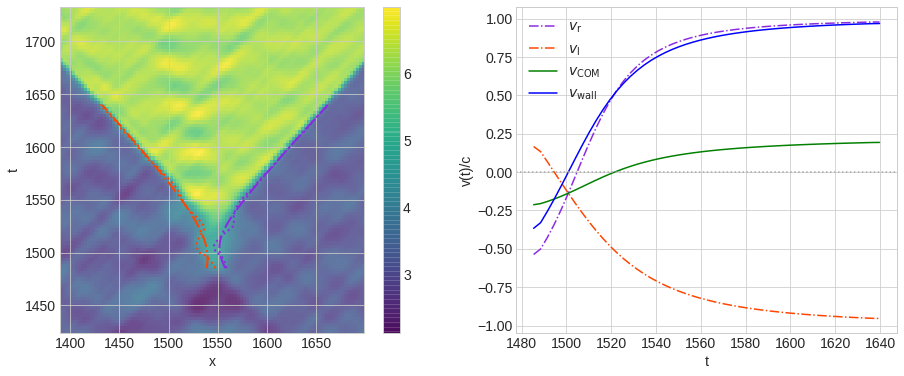

/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:181: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, d, e, f: - np.sqrt(f + (t - e)**2.) + d
/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:171: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, a, b, c: np.sqrt(c + (t - b)**2.) + a


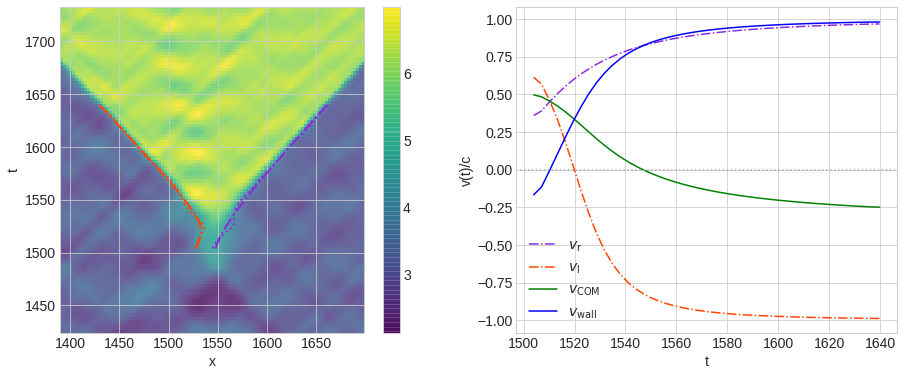

/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:181: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, d, e, f: - np.sqrt(f + (t - e)**2.) + d
/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:171: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, a, b, c: np.sqrt(c + (t - b)**2.) + a


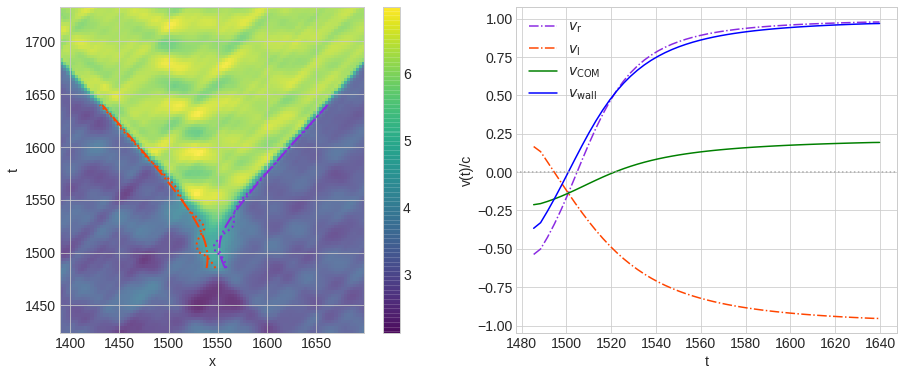

/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:181: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, d, e, f: - np.sqrt(f + (t - e)**2.) + d
/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:171: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, a, b, c: np.sqrt(c + (t - b)**2.) + a


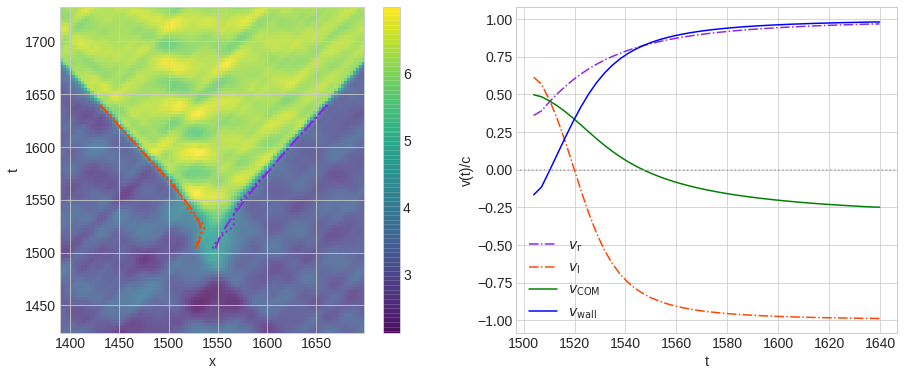

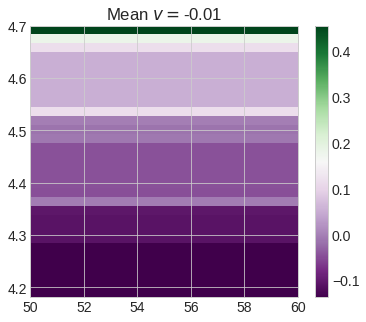

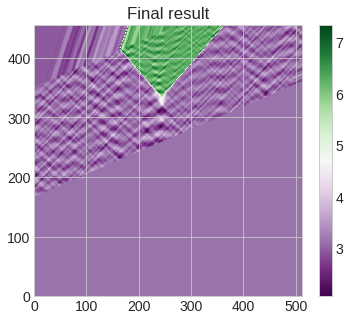

/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:181: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, d, e, f: - np.sqrt(f + (t - e)**2.) + d
/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:171: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, a, b, c: np.sqrt(c + (t - b)**2.) + a


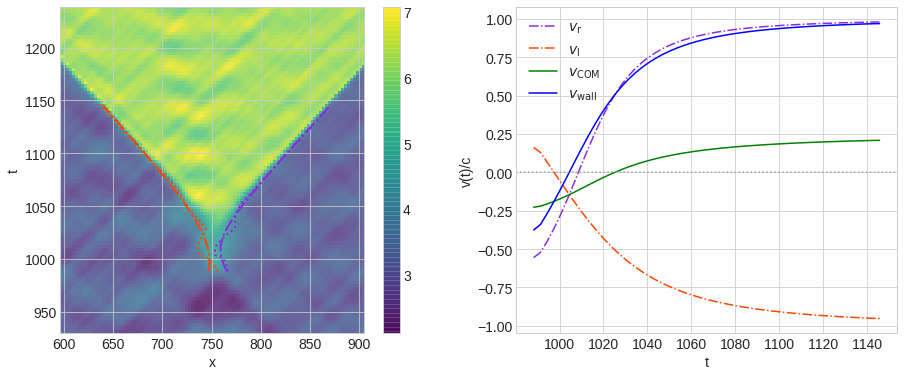

/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:181: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, d, e, f: - np.sqrt(f + (t - e)**2.) + d
/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:171: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, a, b, c: np.sqrt(c + (t - b)**2.) + a


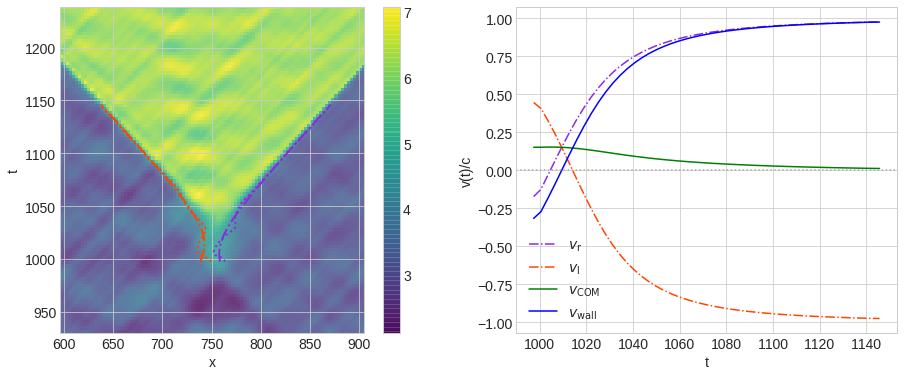

/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:181: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, d, e, f: - np.sqrt(f + (t - e)**2.) + d
/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:171: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, a, b, c: np.sqrt(c + (t - b)**2.) + a


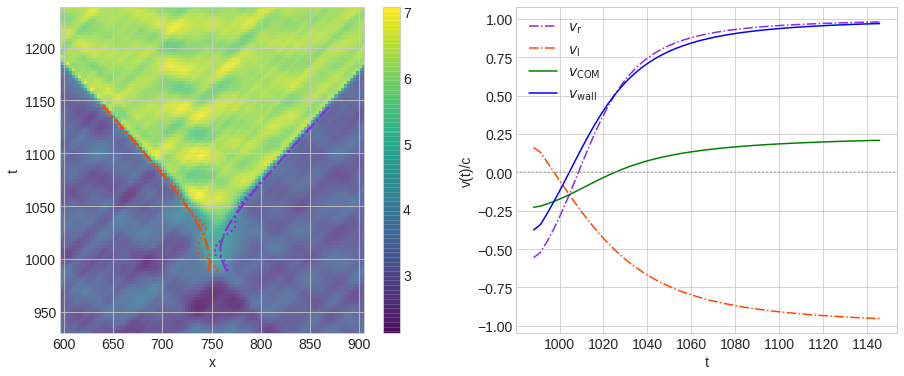

/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:181: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, d, e, f: - np.sqrt(f + (t - e)**2.) + d
/home/dpirvu/project/velocityCOM/thermal/bubble_tools.py:171: RuntimeWarning: invalid value encountered in sqrt
  hyperbola    = lambda t, a, b, c: np.sqrt(c + (t - b)**2.) + a


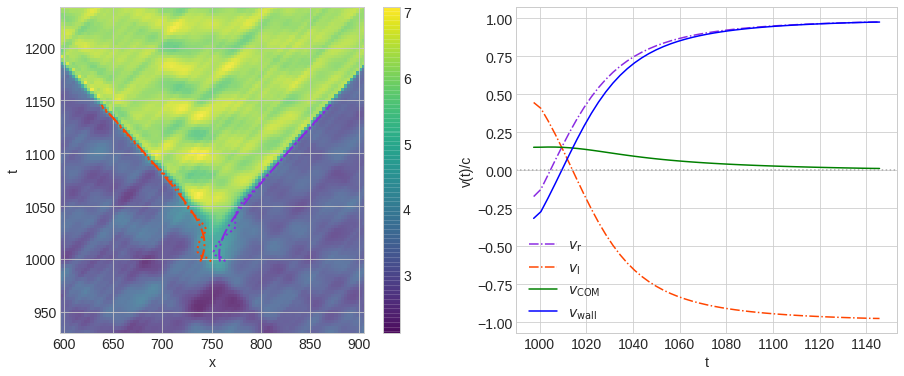

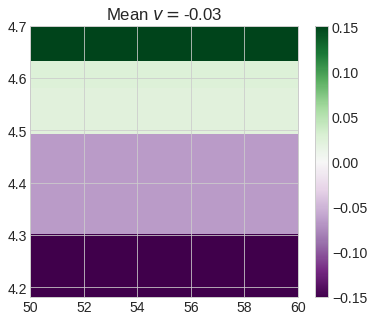

Final detection: beta, stbeta -0.03287751681823588 0.09479414579080053
All Done.


In [55]:
asim =1
bsim =2
plots = True

for sim in simList[asim : bsim]:
    print('Starting simulation', sim)
    loc_sim = clean_sim_location(nLat, lamb, ph0, temp, sim)+'.npy'
    fullreal, sim, tdecay = np.load(loc_sim)
    print('Looking at at temperature T, phi0, m2, sigma:', temp, ph0, m2eff, sigmafld)

    # this is to speed up the boosting in anticipation of the N-column simulations 
    bubble = np.asarray([fullreal[0]])
    simple_imshow(bubble[0], [0,len(bubble[0][0]),0,len(bubble[0])], 'Original')

    maxwin = 100
    tcen, xcen = find_nucleation_center(bubble[0], phieq, crit_thresh, crit_rad)
    tl,tr = max(0, tcen-maxwin), min(nT-1, tcen+maxwin)
    xl,xr = max(0, xcen-maxwin), min(nN-1, xcen+maxwin)

    fig = plt.figure(figsize = (5, 4))
    ext = [xl,xr,tl,tr]
    plt.imshow(bubble[0,tl:tr,xl:xr], interpolation='none', extent=ext, origin='lower')
    plt.plot(xcen,tcen,'bo')
    plt.xlabel('x'); plt.ylabel('t'); plt.show()

    bubble = bubble[:, tcen-maxwin:tcen+maxwin]
    fullreal = fullreal[:, tcen-maxwin:tcen+maxwin]

    beta, stbeta = find_COM_vel(bubble, ampList, xList, nLat, lightc, phieq, crit_thresh, crit_rad, dx, plots)
    bool, vellist = True, []

    while np.abs(beta) > 0.05:
        if np.abs(beta) > 0.5:
            beta = np.sign(beta)*random.randint(1,6)/20.

 #       if len(vellist)==0: beta=0.7
        vellist.append(beta); print(beta, vellist)

        simple_imshow(bubble[0], [0,len(bubble[0][0]),0,len(bubble[0])], 'Before')
        bubble = boost_bubble(bubble, nLat, lightc, phieq, V, beta, crit_thresh, crit_rad, normal)
        simple_imshow(bubble[0], [0,len(bubble[0][0]),0,len(bubble[0])], 'After')

        beta, stbeta = find_COM_vel(bubble, ampList, xList, nLat, lightc, phieq, crit_thresh, crit_rad, dx, plots)
        if np.isnan(beta):
            print('Dead end.')
            bool = False
            break

    if bool:
        vellist.append(beta)
        totbeta = get_totvel_from_list(vellist)
        finalreal = boost_bubble(fullreal, nLat, lightc, phieq, V, totbeta, crit_thresh, crit_rad, normal)

        simple_imshow(finalreal[0], [0,len(finalreal[0][0]),0,len(finalreal[0])], 'Final result')
        testbeta, teststbeta = find_COM_vel(finalreal, ampList, xList, nLat, lightc, phieq, crit_thresh, crit_rad, dx, plots)
        print('Final detection: beta, stbeta', testbeta, teststbeta)

    #    np.save(bubble_at_rest(nLat, lamb, ph0, temp, sim), np.asarray([sim, finalreal, totbeta, beta]))
    #    print('Total vel, final vel, vel list:', totbeta, beta, vellist)

print('All Done.')


In [89]:
totbeta

-0.3778860794207605

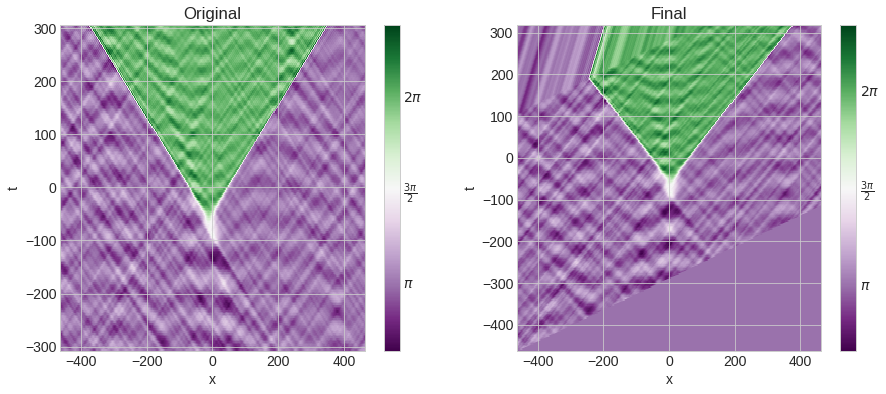

In [94]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
# this is to speed up the boosting in anticipation of the N-column simulations 
bubble = fullreal[0]
nT, nN = np.shape(bubble)
maxwin = 150
tcen, xcen = find_nucleation_center(bubble, phieq, crit_thresh, crit_rad)
tl,tr = max(0, tcen-maxwin), min(nT-1, tcen+maxwin)
xl,xr = max(0, xcen-maxwin), min(nN-1, xcen+maxwin)
bubble = bubble[tl:tr,xl:xr]
nT, nN = np.shape(bubble)

tcen, xcen = find_nucleation_center(bubble, phieq, crit_thresh, crit_rad)
extent_floats = [(-xcen)*dx, (nN-xcen)*dx, (-tcen)*dx, (nT-tcen)*dx]
im0 = ax[0].imshow(bubble, aspect='auto', interpolation='none', extent=extent_floats, origin='lower', cmap='PRGn')
clb0 = plt.colorbar(im0, ax = ax[0])
clb0.locator     = matplotlib.ticker.MultipleLocator(np.pi/2)
clb0.formatter   = matplotlib.ticker.FuncFormatter(multiple_formatter())
clb0.update_ticks()


# this is to speed up the boosting in anticipation of the N-column simulations 
bubble = finalreal[0]
nT, nN = np.shape(bubble)
tcen, xcen = find_nucleation_center(bubble, phieq, crit_thresh, crit_rad)
tl,tr = max(0, tcen-maxwin), min(nT-1, tcen+maxwin)
xl,xr = max(0, xcen-maxwin), min(nN-1, xcen+maxwin)
bubble = bubble[tl:tr,xl:xr]
nT, nN = np.shape(bubble)

tcen, xcen = find_nucleation_center(bubble, phieq, crit_thresh, crit_rad)
extent_floats = [(-xcen)*dx, (nN-xcen)*dx, (-tcen)*dx, (nT-tcen)*dx]
im1 = ax[1].imshow(bubble, aspect='auto', interpolation='none', extent=extent_floats, origin='lower', cmap='PRGn')
clb1 = plt.colorbar(im1, ax = ax[1])
clb1.locator     = matplotlib.ticker.MultipleLocator(np.pi/2)
clb1.formatter   = matplotlib.ticker.FuncFormatter(multiple_formatter())
clb1.update_ticks()

ax[0].set_title('Original')
ax[1].set_title('Final')
ax[0].set_xlabel('x'); ax[0].set_ylabel('t')
ax[1].set_xlabel('x'); ax[1].set_ylabel('t')
plt.savefig('./data/final_original_bubble.pdf')
plt.show()
